In [3]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

# 푸리에 변환과 스펙트럼

음성(speech), 음악(music) 등의 음향(sound) 데이터에서 특징(feature)을 추출하는 방법인 푸리에 변환(Fourier transfrom)과 스펙트럼(spectrum)에 대해서 알아본다.

## 정현파 조합

모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있다. 퓨리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법이다.

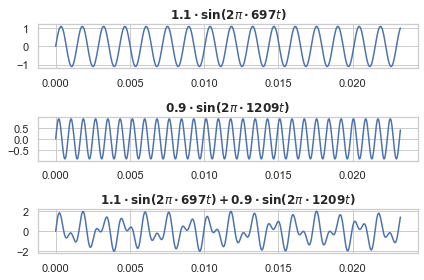

In [7]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2

plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

## 복소 지수함수

오일러 공식에 의해 지수부가 허수(imaginary number)인 복소 지수함수(complex exponential function)는 코사인 함수인 실수부와 사인 함수인 허수부의 합으로 나타난다. 

$$ \exp(i\cdot x) = \cos x + i\sin x $$

다음은 주기가 $T$, 주파수가 $\frac{2\pi}{T}$인 복수 지수함수로서 주기가 $T$인 사인과 코사인의 조합이 된다.

$$ \exp \left( i\cdot 2\pi\frac{1}{T} t \right) = \cos \left(2\pi \dfrac{1}{T} t \right) +i\sin \left(2\pi \dfrac{1}{T} t \right) $$

따라서 주기가 $\frac{T}{n}$, 주파수가 $n\frac{2\pi}{T}$인 복수 지수함수는 다음과 같다.

$$ \exp \left( i\cdot 2\pi\frac{n}{T} t \right) = \cos \left(2\pi \dfrac{n}{T} t \right) +i\sin \left(2\pi \dfrac{n}{T} t \right) $$

## 푸리에 변환

주기 $T$를 가지고 반복되는(cyclic) 모든 함수 $y(t)$는 주파수와 진폭이 다른 몇 개의 사인 함수(정확히는 복수 지수함수)의 합으로 나타낼 수 있다. 이 사인 함수의 진폭을 구하는 과정을 푸리에 변환(Fourier Transform)이라고 한다.

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

이 식에서 $k$번째 사인 함수의 진폭 $A_n$은 다음 식으로 계산한다. 이것이 푸리에 변환이다.

$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} y(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$

## 이산 푸리에 변환

이산 푸리에 변환(Discrete Fourier Transform) 또는 DFT는 길이가 $N$인 이산시간 시계열 데이터 

$$ y_0, y_1, \ldots, y_{N-1} $$

이 있을 때 이 이산시간 시계열이 주기 $N$으로 계속 반복된다고 가정하여 푸리에 변환을 한 것이다.

이 때 원래의 이산시간 시계열 데이터는 다음 주파수와 진폭이 다른 $N$개의 사인 함수의 합으로 나타난다.

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

이 때 진폭 $Y_k$를 원래의 시계열 데이터에 대한 푸리에 변환값이라고 한다.

$$
Y_k = \sum_{n=0}^{N-1} y_n \cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

## 고속 퓨리에 변환

고속 퓨리에 변환(Fast Fourier Transform, FFT)는 아주 적은 계산량으로 DFT를 하는 알고리즘을 말한다. 길이가 $2^N$인 시계열에만 적용할 수 있다는 단점이 있지만 보통의 DFT가 $O(N^2)$ 수준의 계산량을 요구하는데 반해 FFT는 $O(N\log_2 N)$ 계산량으로 DFT를 구할 수 있다.

실제로는 다음과 같이 계속 반복되는 시계열에 대해 푸리에 변환을 하는 것이다. 따라서 시계열의 시작 부분과 끝 부분이 너무 다르면 원래 시계열에는 없는 신호가 나올 수도 있는데 이를 깁스 현상(Gibbs phenomenon)이라고 한다.

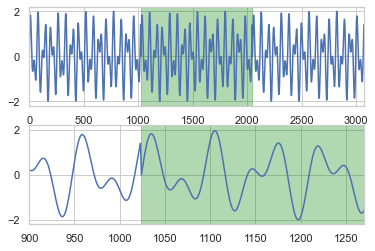

In [8]:
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

scipy 패키지의 fftpack 서브패키지에서 제공하는 fft 명령으로 이 신호에 담겨진 주파수를 분석하면 다음과 같이 692HZ와 1211Hz 성분이 강하게 나타나는 것을 볼 수 있다. 이와 같은 플롯을 피리오도그램(periodogram)이라고 한다.

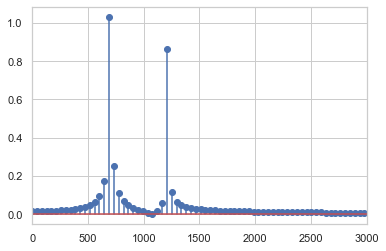

In [9]:
from scipy.fftpack import fft

yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

## DCT

DCT(Discrete Cosine Transform)는 DFT와 유사하지만 기저함수로 복소 지수함수가 아닌 코사인 함수를 사용한다. 
DFT보다 계산이 간단하고 실수만 출력한다는 장점이 있어서 DFT 대용으로 많이 사용된다. 

$$ 
Y_k = \sum_{n=0}^{N-1} y_n \cdot \cos \left( 2\pi\frac{k}{N} \left(\frac{2n+1}{4}\right)\right)  
$$

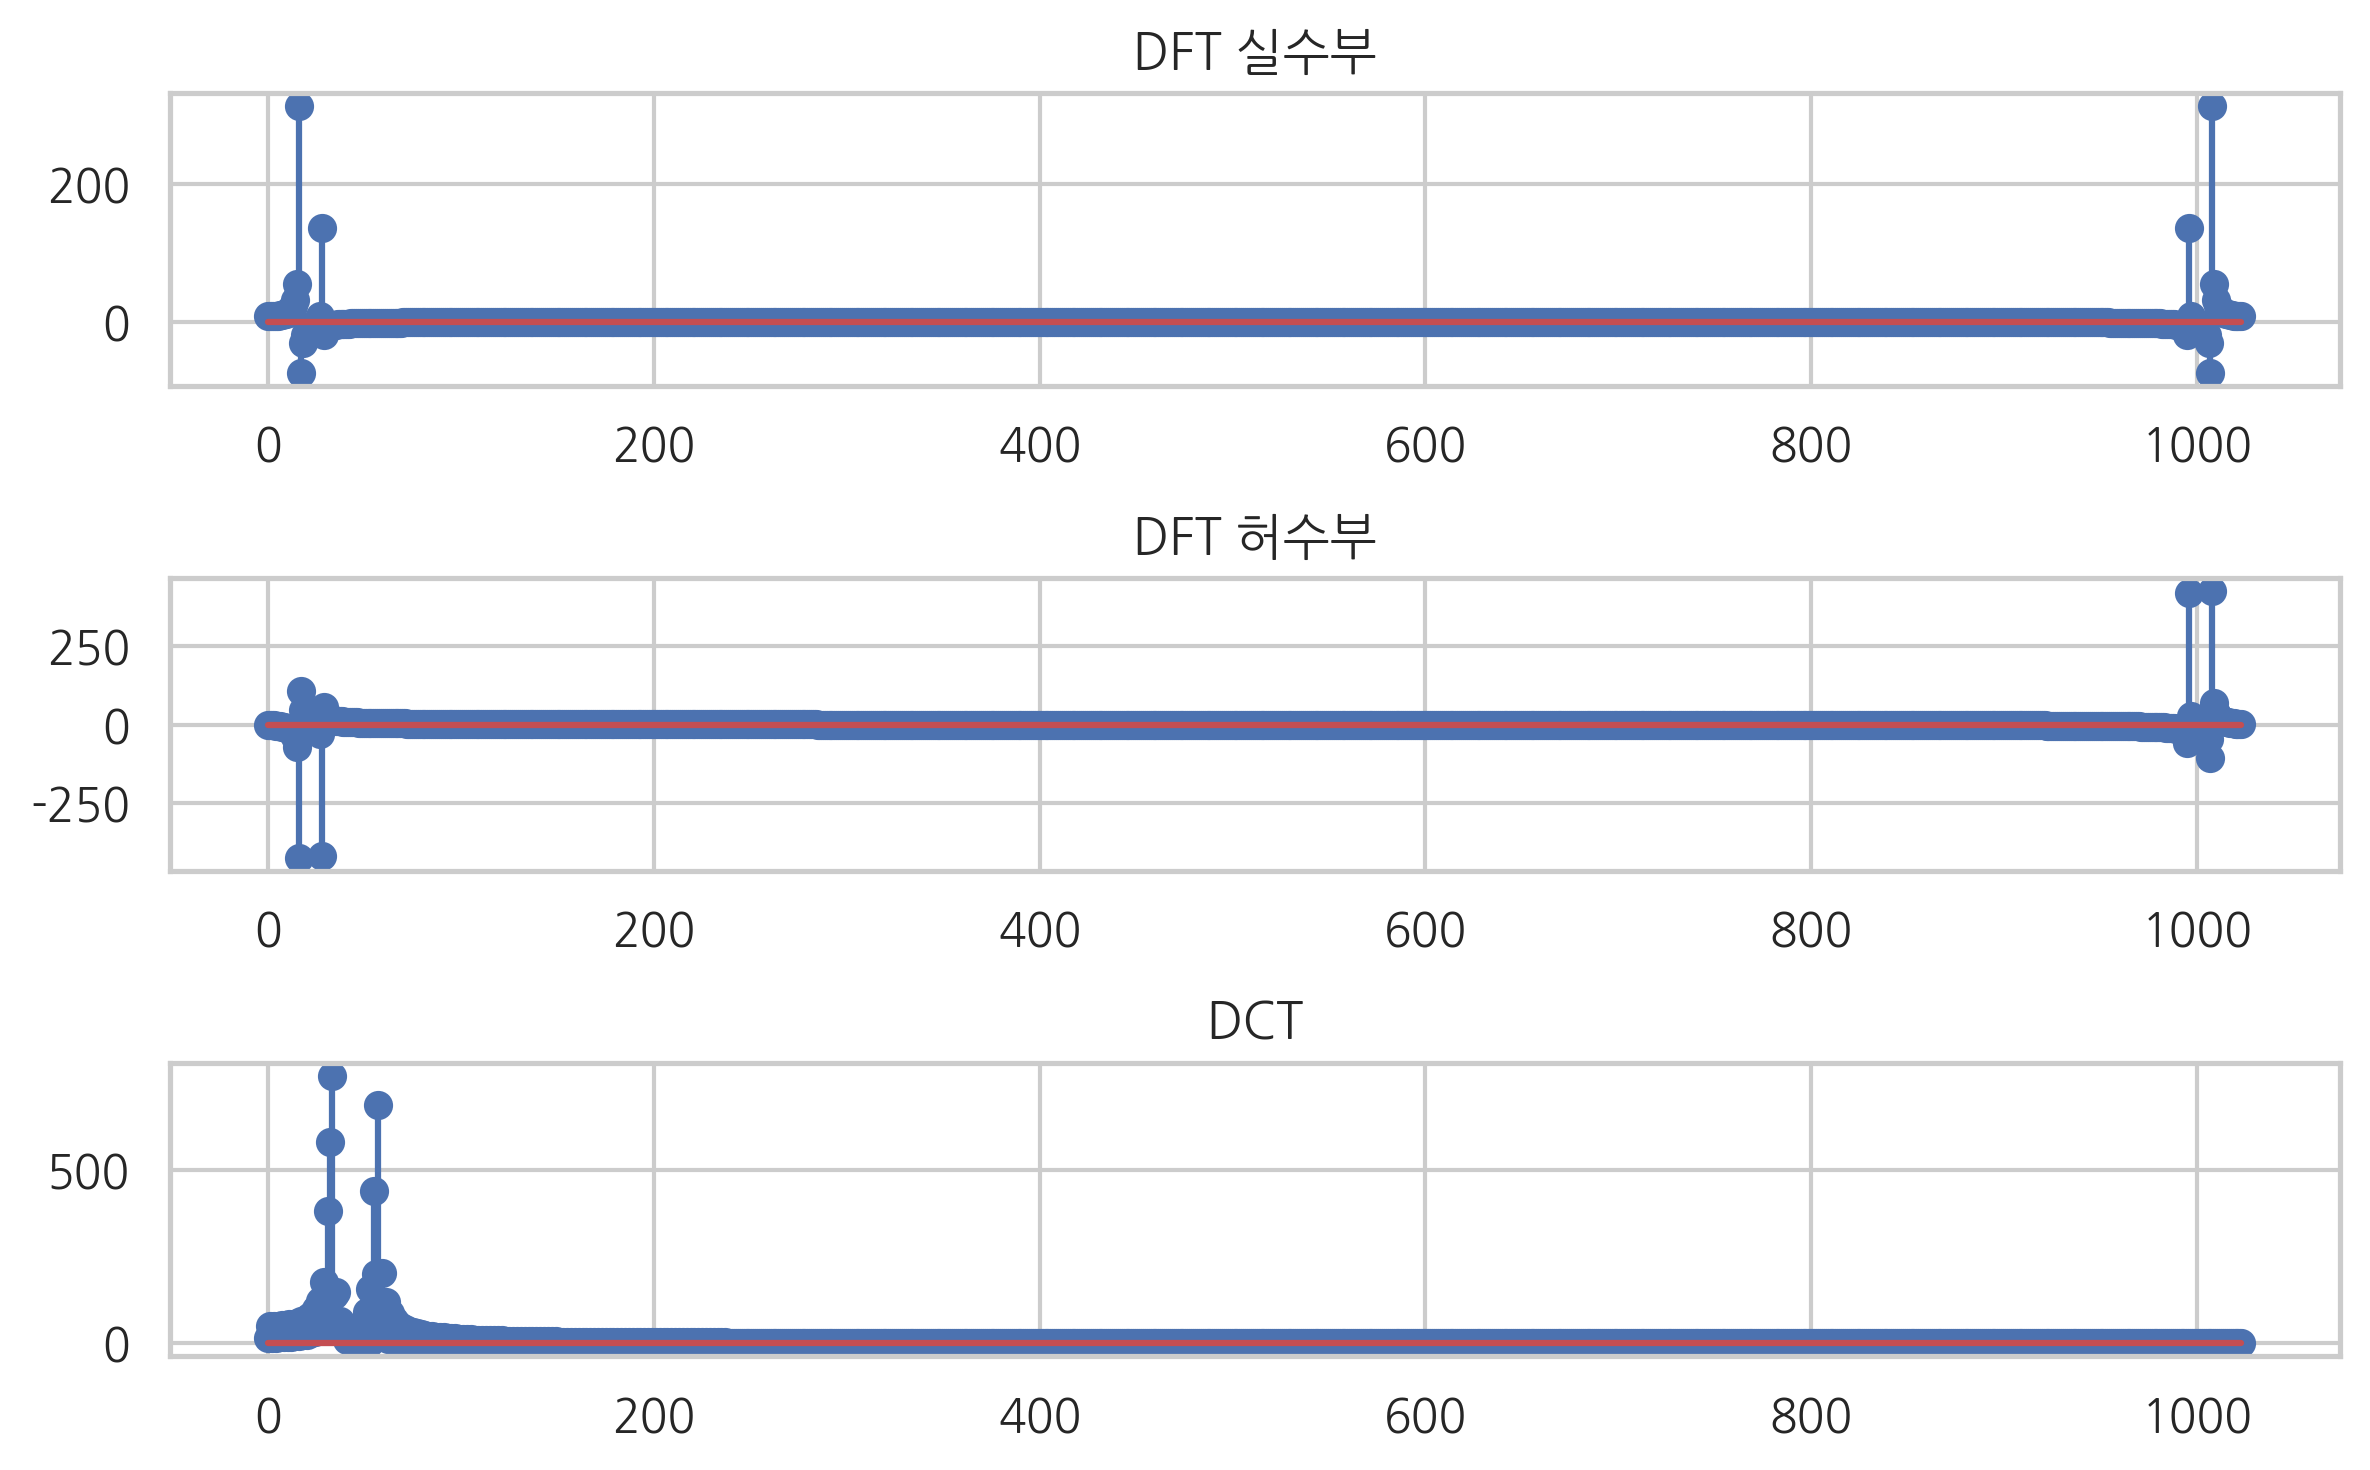

In [4]:
from scipy.fftpack import dct

dct_type = 2
yf2 = dct(y, dct_type, N)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT 실수부")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT 허수부")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()

## 스펙트럼

보통 스펙트럼(spectrum)이라고 부르는 시계열 분석의 정확한 명칭은 파워 스펙트럼(power spectrum) 또는 스펙트럼 밀도(spectral density)이다. 

푸리에 변환은 결정론적인 시계열 데이터를 주파수 영역으로 변환하는 것을 말하지만 **스펙트럼(spectrum)은 확률론적인 확률과정(random process) 모형을 주파수 영역으로 변환**하는 것을 말한다. 따라서 푸리에 변환과 달리 시계열의 위상(phase) 정보는 스펙트럼에 나타나지 않는다.

스펙트럼을 추정할 때 사용하는 방법 중의 하나전체 시계열을 짧은 구간으로 나눈 뒤 깁스 현상을 줄위기 위해 각 구간에 윈도우를 씌우고 FFT 계산으로 나온 값을 평균하는 방법이다. 보통은 로그 스케일로 표현한다.

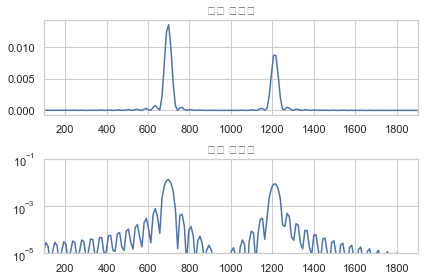

In [10]:
import scipy.signal

f, P = sp.signal.periodogram(y, 44100, nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("선형 스케일")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("로그 스케일")

plt.tight_layout()
plt.show()

## STFT

STFT(Short-Time Fourier Transform)는 주파수 특성이 시간이 따라 달라지는 사운드를 분석하기 위한 방법이다. 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해 스펙트럼을 구한 데이터이다. 시간-주파수의 2차원 데이터로 나타난다.

<img src="https://datascienceschool.net/upfiles/cf872b64af8c4af5b20cea29d98e4cfe.png">

## librosa 패키지

파이썬으로 STFT 스펙트럼 분석을 하려면 librosa 패키지를 사용한다.

주피터 노트북에서 librosa 패키지를 사용할 때는 `jupyter_notebook_config.py`파일의  `iopub_data_rate_limit` 설정을 10000000 정도로 크게 해야 한다.

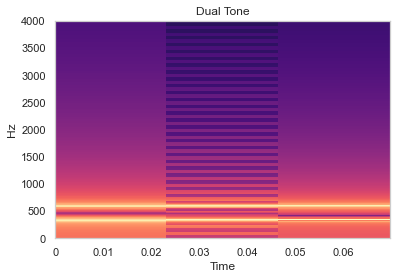

In [11]:
import librosa
import librosa.display

D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()

In [15]:
import scipy.io.wavfile

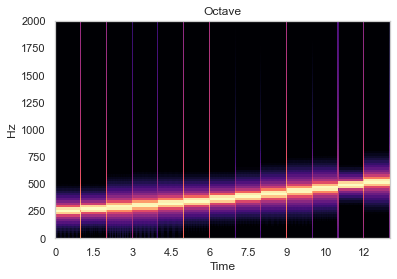

In [16]:
sr_octave, y_octave = sp.io.wavfile.read("octave.wav")

D_octave = np.abs(librosa.stft(y_octave))
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=sr_octave, y_axis='linear', x_axis='time')
plt.title('Octave')
plt.ylim(0, 2000)
plt.show()

## 멜 스펙트럼

멜 스펙트럼은 주파수의 단위를 다음 공식을 따라 멜 단위(mel unit)로 바꾼 스펙트럼을 말한다.

$$ m = 2595 \log_{10}\left(1 + \frac{f}{700}\right) $$

<img src="https://datascienceschool.net/upfiles/fdd4d9c6c24f454c88eec4b9fff0b0a0.png">

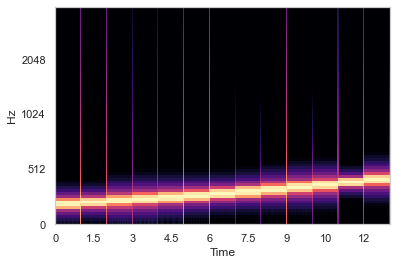

In [17]:
S_octave = librosa.feature.melspectrogram(y=y_octave, sr=sr_octave, n_mels=128)
librosa.display.specshow(librosa.power_to_db(S_octave, ref=np.max), sr=sr_octave, y_axis='mel', x_axis='time')
plt.ylim(0, 4000)
plt.show()

## MFCC

MFCC(Mel-frequency cepstral coefficients)는 Mel Scale Spectrum을 40개의 주파수 구역(band)으로 묶은뒤에 이를 다시 푸리에 변환하여 얻은 계수이다. 스펙트럼이 어떤 모양으로 되어 있는지를 나타내는 특성값이라고 생각할 수 있다.

<img src="https://datascienceschool.net/upfiles/c946c48e617f4382ae5fe71fc036cdae.png">

<img src="https://datascienceschool.net/upfiles/07847df55e764114a692537f97ef6500.png">

<img src="https://datascienceschool.net/upfiles/24c8b7ee6dc143f49f9265b2816c2b0c.png">

<img src="https://datascienceschool.net/upfiles/b965fdf1228d4d84a5a42538b8ec2eed.jpeg">

<img src="https://datascienceschool.net/upfiles/f2c2bd451cad40ec888119af8382d26e.png">

<img src="https://datascienceschool.net/upfiles/9f8609ecfc0a4a7bb7068215ab3b2590.png">

<img src="https://datascienceschool.net/upfiles/a2bb21532fa140578a9ddbf87f476f15.jpeg" >

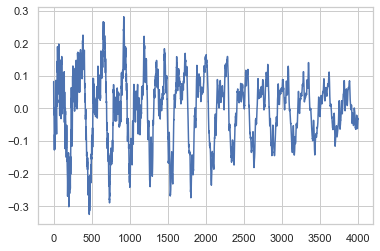

In [18]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)

plt.plot(y[1000:5000])
plt.show()

In [19]:
from IPython.display import Audio, display
Audio(y, rate=sr)

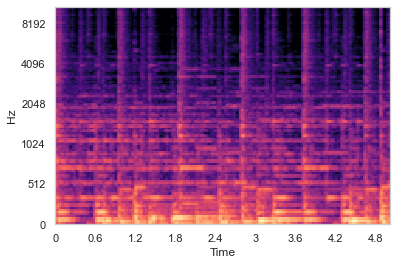

In [20]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, y_axis='mel', x_axis='time')
plt.show()

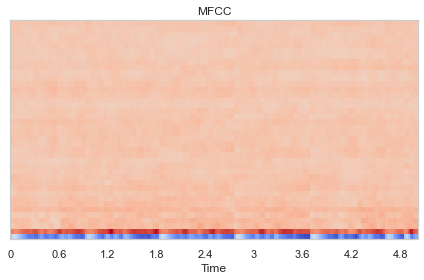

In [21]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC')
plt.tight_layout()
plt.show()